**IMPORT MODULES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

**READ THE DATA**

In [2]:
df=pd.read_csv("D:\Data\Fraud Detection.csv")

In [3]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


**EDA AND DATA PREPROCESSING**

In [5]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
print(df.describe(include='all'))

           Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                226976           NaN                693   
top               NaN      15-12-2020 21:26           NaN  fraud_Kilback LLC   
freq              NaN                    16           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800430e+14                NaN   
50%     277859.000000                   NaN  3.521420e+15                NaN   
75%     416788.500000                   NaN  4.635330e+15                NaN   
max     555718.000000                   NaN  4.992350e+18                NaN   

             category            amt   

In [7]:
print(df.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


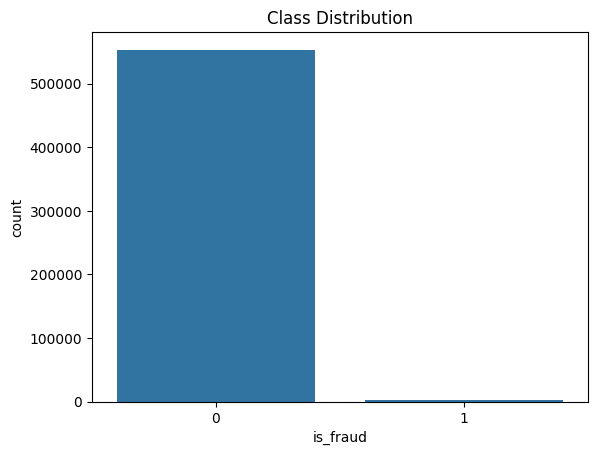

In [8]:
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution')
plt.show()

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [10]:
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second

In [11]:
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'dob', 'trans_num'])

In [12]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [13]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [14]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**DATA SPLITTING AND TRAINING**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

**LOGISTIC REGRESSION**

In [18]:
logreg_model = LogisticRegression()

In [19]:
logreg_model.fit(X_train_preprocessed, y_train)

LogisticRegression()

In [20]:
y_pred_logreg = logreg_model.predict(X_test_preprocessed)

In [21]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

In [22]:
print('Logistic Regression Model Metrics:')
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'Precision: {precision_logreg:.4f}')
print(f'Recall: {recall_logreg:.4f}')
print(f'F1 Score: {f1_logreg:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_logreg}')

Logistic Regression Model Metrics:
Accuracy: 0.9960
Precision: 0.3654
Recall: 0.0446
F1 Score: 0.0795
Confusion Matrix:
[[110685     33]
 [   407     19]]


**DECISION TREE**

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)

In [24]:
dt_model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred_dt = dt_model.predict(X_test_preprocessed)

In [26]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [27]:
print('\nDecision Tree Model Metrics:')
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_dt}')


Decision Tree Model Metrics:
Accuracy: 0.9975
Precision: 0.6894
Recall: 0.6408
F1 Score: 0.6642
Confusion Matrix:
[[110595    123]
 [   153    273]]
